### 이미지위치변경

* cv2.warpAffine(image, M, dsize) : 이미지의 위치를 변경합니다. 
    * M : 변환 행렬 
    * dsize : Manual Size


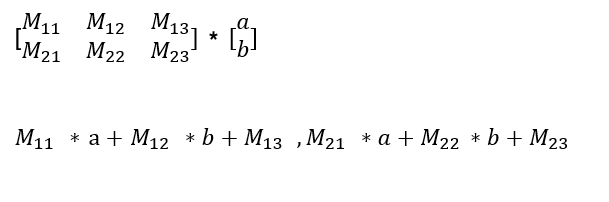

### * 위치변경 변환 행렬 
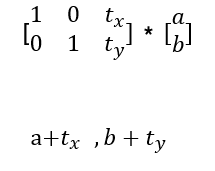

#### 위치변경

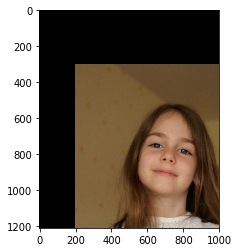

In [2]:
%matplotlib inline
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

image = cv2.imread('img/image.jpg')

height, width = image.shape[:2]

M = np.float32([[1, 0, 200], [0, 1, 300]])
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 회전

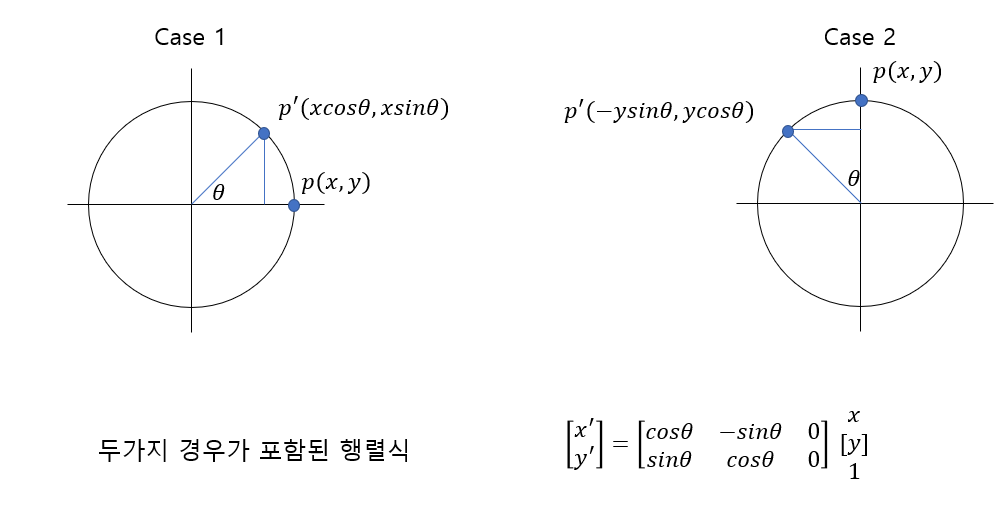

#### 이미지 회전

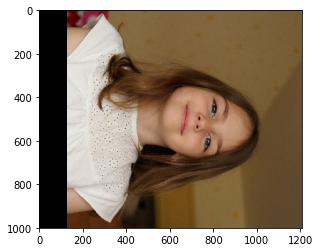

In [9]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('img/image.jpg')
rows, cols = img.shape[0:2]

#라디안 각도 계산 ( 60진법을 호도법(도)으로 변경)
d90 = 90.0 * np.pi / 180

#변환행렬 생성
m90 = np.float32([[np.cos(d90), -1 * np.sin(90), rows], [np.sin(d90), np.cos(d90), 0]])

#변환행렬 적용
r90 = cv2.warpAffine(img, m90, (rows, cols))

plt.imshow(cv2.cvtColor(r90, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 회전을 위한 변환행렬 만들기

* cv2.getRotationMatrix2D(center, angle, scale) : 이미지 회전을 위한 행렬을 생성합니다. 
    * center : 회전 중심좌표, 튜플(x,y)
    * angle : 회전각도
    * scale : 확대/축소 배율

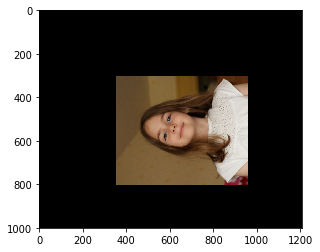

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/image.jpg')

# 행과 열 정보만 저정합니다. 
rows, cols = img.shape[0:2]

m90 = cv2.getRotationMatrix2D((rows / 2, cols / 2), 90, 0.5)
dst = cv2.warpAffine(img, m90, (rows, cols))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show() 

#### 이미지변환 _2 

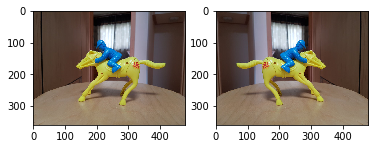

In [10]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('img/pump_horse.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_flip = cv2.flip(img1, 1)# 1은 좌우 반전, 0은 상하 반전입니다.

# 이 아래 부분은 그림을 화면에 출력하기 위한 부분으로, OpenCV 알고리즘과는 상관이 없습니다.
plt.subplot(1, 2, 1)
plt.imshow(img1)

plt.subplot(1, 2, 2)
plt.imshow(img_flip)
plt.show()

### 어핀 변환

* matrix = cv2.getAffineTransform(pts1, pts2) 
   : 변환 전과 변환 후의 3개의 점을 짝 지어 매핑하여 변환행렬을 거꾸로 계산한다. 
    - pts1 : 변환 전 영상의 좌표 3개, 3 x 2 Numpy 배열(float32)
    - pts2 : 변환 후 영상의 좌표 3개, pts1과 동일
    - matrix : 변환행렬 반환, 2 x 3 행렬

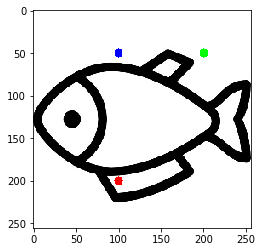

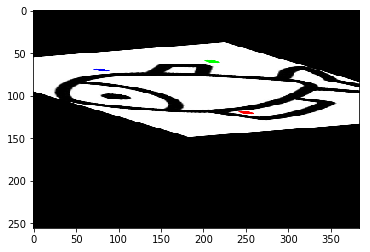

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/fish.jpg')
rows, cols = img.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)

#---④ 어핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

#---⑤ 결과 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()


### 원근 변환
*  mtrx = cv2.getPerspectiveTransform(pts1, pts2) 
: 변환 전과 후를 짝짓는 4개의 매핑 좌표만 지정해주면 원근 변환에 필요한 3 X 3 변환 행렬을 계산하며 원근을 고려한다. 
    - pts1 : 변환 이전 영상의 좌표 4개, 4 X 2 Numpy 배열(float32)
    - pts2 : 변환 이전 영상의 좌표 4개, 4 X 2 Numpy 배열(float32)
    - mtrx : 변환행렬 반환, 3 X 3 행렬 
    
* dst = cv2.warpPerspective(src, mtrx, dsize[, dst, flags, borderMode, borderValue]) : cv2.warpAffine()함수와 기능 동일
    - src : image
    - mtrx : 변환행렬 
    - dsize : Manual Size 

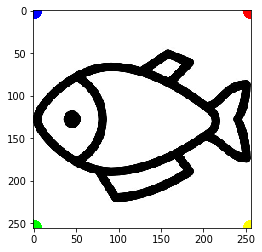

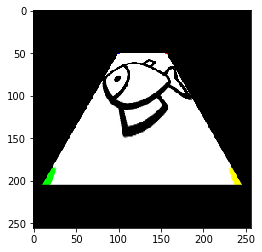

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/fish.jpg')
rows, cols = img.shape[:2]

#---① 원근 변환 전 후 4개 좌표, 코드 전체 작성후 pts2 좌표 변경해보기
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

#---② 변환 전 좌표를 원본 이미지에 표시

cv2.circle(img, (0, 0), 10, (255,0, 0), -1)
cv2.circle(img, (0, rows), 10, (0,255,0), -1)
cv2.circle(img, (cols, 0), 10, (0,0,255), -1)
cv2.circle(img, (cols, rows), 10, (0,255,255), -1)

#---③ 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)

#---④ 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 예제) 비스듬히 찍힌 종이이미지를 이미지변환하기 

782 586


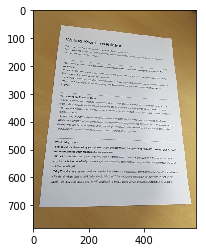

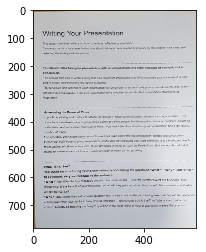

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/paper.jpg')
rows, cols = img.shape[:2]
print(rows, cols)

# 내가 직접 조정한 코드
# pts1 = np.float32([[0, 0], [0, rows], [cols, 0], [cols, rows]])
# pts2 = np.float32([[-100, -50], [0, rows + 100], [cols + 130, -200], [cols - 10, rows + 100]])

# 강사님 코드
pts1 = np.float32([[100, 50], [15, rows-85], [cols-100, 100], [cols-50, rows-85]])
pts2 = np.float32([[0,0], [0, rows], [cols, 0], [cols, rows]])

mtrx = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, mtrx, (cols, rows))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

# Filtering(p80)
####  필터링 : 입력 값에서 원하지 않는 값은 걸러내고 원하는 결과만을 얻는다는 의미 
#### 영상을 흐리게 만들거나 또렷하게 만들기도 해서 영상의 품질을 높인다.
#### 엣지(경계)를 검출하고 엣지의 방향을 알아내는 등 객체 인식과 분리의 기본이 되는 정보를 계산

#### 컨볼루션 계산 
* 필터링에서 가장 많이 사용하는 계산방법 
* n x n 크기의 커널의 각 요소와 대응하는 입력 픽셀 값을 곱해서 결과 값으로 결정하는 연산의 반복 

####  블러링 : 초점이 맞지 않은 것처럼 흐릿하게 만드는 것
* 평균 블러링 : 주변 픽셀 값들의 평균을 적용한다. 픽셀값이 주변과 차이가 적어져 전체적으로 흐려진다.
* 가우시안 블러링 : 정규분포를 따르는 모양으로 가운데에 있을 수록 크고 멀어질수록 작아지는 커널을 사용 한다. 선택 픽셀에 가까울 수록 많은 영향을 주고 멀어질수록 적은 영향을 주기 때문에 노이즈를 제거하는 효과가 있다

#### * cv2.filter2D(src, ddepth, kernel[, dst, anchor, delta,  borderType]) : 모든 픽셀에 대해서 각각 filter 적용
    - src : 입력값
    - ddepth : 출력값의 dtype 
        -1 : 입력 값과 동일
        CV_8U, CV16UCV16S, CV_32F, CV_64F
    - kelnel : 컨볼루션 커널, float32의 n x n 크기의 배열 

#### 평균 필터 생성해서 블러 적용

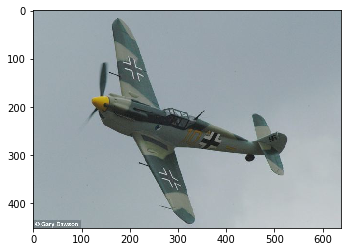

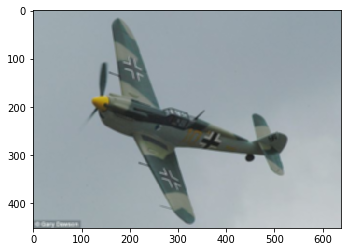

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/aircraft.jpg')
'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((5,5))/5**2 # -> 위의 필터 커널
# 필터 적용             ---③
blured = cv2.filter2D(img, -1, kernel)

# 결과 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(blured, cv2.COLOR_BGR2RGB))
plt.show()

#### 전용 함수를 이용한 블러링

* dst = cv2.blur(src, ksize[, dst, anchor, borderType])
: 커널 크기만 지정하면 알아서 평균 커널을 생성
    - src : 입력 영상
    - ksize : 커널의 크기

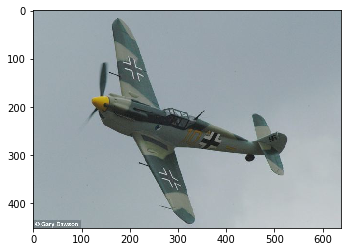

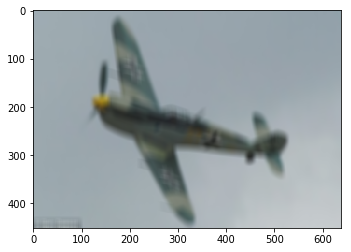

In [41]:
import cv2
import numpy as np

file_name = 'img/aircraft.jpg'
img = cv2.imread(file_name)

# blur() 함수로 블러링
blur = cv2.blur(img, (10, 20))

# 결과 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

### 가우시안 블러  
: 평균이 아닌 가우시안 분포를 갖는 커널로 중앙값이 가장 크고 멀어질수록 그 값이 작아지는 커널
#### dst = cv2.GaussianBlur(src, ksize, sigmaX)
    * src : 입력 
    * ksize : 커널의 크기 
    * X방향 표준편차
        sigmaX에 0을 전달하면 자동으로 표준편차 값을 선택해서 사용

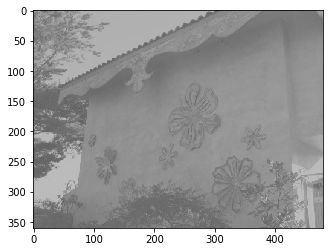

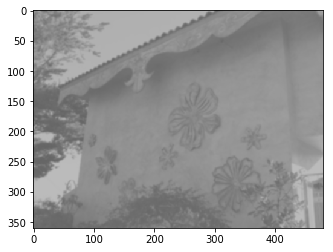

In [50]:
import cv2 
import matplotlib.pyplot as plt

image = cv2.imread('img/abnormal.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

dst = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 미디언 블러링
    - 커널 영역 픽셀 값 중에 중간 값을 대상 픽셀의 값으로 선택하는 것
    - 잡음 제거에 효과적 

* dst = cv2.medianBlur(src, ksize)
    - src : 입력영상
    - ksize : 커널크기

In [51]:
import cv2
import numpy as np

img = cv2.imread('img/salt_pepper_noise.jpg')

# 미디언 블러 적용 --- ①
blur = cv2.medianBlur(img, 5)

# 결과 출력 
merged = np.hstack((img, blur))
cv2.imshow('media', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 바이레터럴 필터
    - 블러링 필터의 경계도 흐릿하게 만드는 문제를 보완
    - 가우시안 필터와 경계 필터 2개 사용
    - 노이즈는 없고 경계가 비교적 또렷한 영상을 얻음 
    - 속도가 느림 
    
* dst = cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst, borderType])
    - src : 입력 영상
    - d : 필터의 직경 , 5보다 크면 매우 느림
    - sigmaColor : 색공간 필터의 시그마 값
    - sigmaSpace : 좌표 공간의 시그마값 (sigmaSpace와 같은 값을 권장하며, 10~150 사이 값을 권장)

In [53]:
import cv2
import numpy as np

img = cv2.imread("img/gaussian_noise.jpg")

# 가우시안 필터 적용 ---①
blur1 = cv2.GaussianBlur(img, (5, 5), 0)

# 바이레터럴 필터 적용 ---②
blur2 = cv2.bilateralFilter(img, 5, 150, 150)

# 결과 출력
merged = np.hstack((img, blur1, blur2))
cv2.imshow('bilateral', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 경계검출 
: 객체 인식과 추적의 중요한 작업

### 소벨 필터 
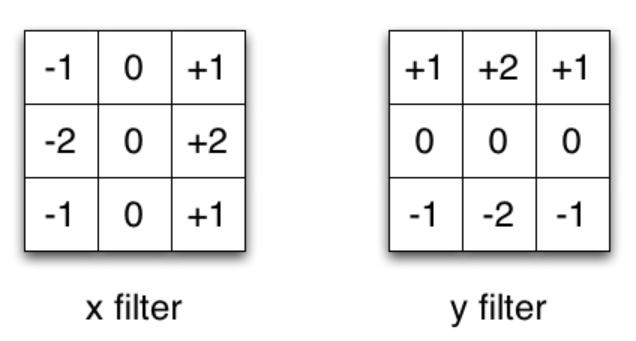

* dst = cv2.Sobel(src, ddepth, dx, dy[, dst, ksize, scale, delta, borderType[)
    - src : 입력 영상
    - ddepth : 출력 영상의 dtype( -1 : 입력 영상과 동일) 
    - dx, dy : 미분 차수(0, 1, 2, 둘 다 0은 안됨)
    - ksize : 커널의 크기(1, 3, 5, 7 중 선택 )
    - scale : 미분에 사용할 계수
    - delta : 연산 결과에 가산할 값 

In [65]:
import cv2
import numpy as np

img = cv2.imread("img/sudoku.jpg")

# 소벨 커널을 직접 생성해서 엣지 검출 ---①
## 소벨 커널 생성
gx_k = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gy_k = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

## 소벨 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 소벨 API를 생성해서 엣지 검출
sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(img, -1, 0, 1, ksize=3)

# 결과 출력
merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx + edge_gy))
merged2 = np.hstack((img, sobelx, sobely, sobelx + sobely))
merged = np.vstack((merged1, merged2))

cv2.imshow('sobel', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 샤르 필터 
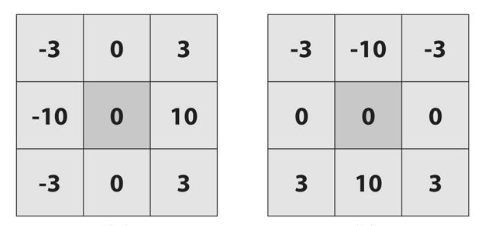

* dst = cv2.Scharr(src, ddepth, dx, dy[, dst, scale, delta, borderType]) :
    - src : 입력 영상
    - ddepth : 출력 영상의 dtype( -1 : 입력 영상과 동일) 
    - dx, dy : 미분 차수(0, 1, 2, 둘 다 0은 안됨)
    - scale : 미분에 사용할 계수
    - delta : 연산 결과에 가산할 값

In [64]:
import cv2
import numpy as np

img = cv2.imread("img/sudoku.jpg")

# 샤르 커널을 직접 생성해서 엣지 검출 ---①
gx_k = np.array([[-3,0,3], [-10,0,10],[-3,0,3]])
gy_k = np.array([[-3,-10,-3],[0,0,0], [3,10,3]])

edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)

# 샤르 API로 엣지 검출 ---②

scharrx = cv2.Scharr(img, -1, 1, 0)
scharry = cv2.Scharr(img, -1, 0, 1)


# 결과 출력
merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx + edge_gy))
merged2 = np.hstack((img, scharrx, scharry, scharrx + scharry))
merged = np.vstack((merged1, merged2))

cv2.imshow('Scharr', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 라플라시안 필터
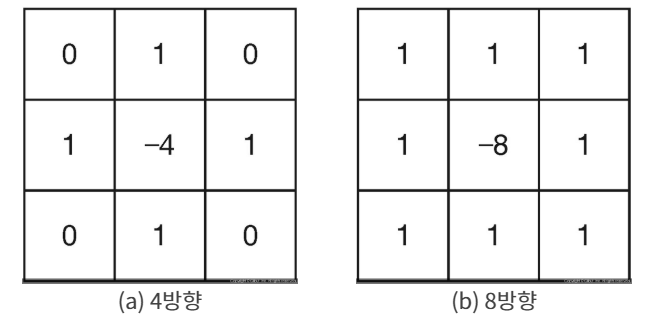

* dst = cv2.Laplacian(src, ddepth[, dst, ksize, scale, delta, borderType):
    - src : 입력 영상
    - ddepth : 출력 영상의 dtype( -1 : 입력 영상과 동일) 
    - dx, dy : 미분 차수(0, 1, 2, 둘 다 0은 안됨)
    - ksize : 커널의 크기(1, 3, 5, 7 중 선택 )
    - scale : 미분에 사용할 계수
    - delta : 연산 결과에 가산할 값 
    
**라플라시안 필터는 노이즈에 민감하여 가우시안 필터로 노이즈를 제거하고 사용하는 것이 좋다.**

In [16]:
import cv2
import numpy as np



# 라플라시안 필터 적용 ---①


# 결과 출력


### 캐니 엣지(가장 많이 사용)
* edges = cv2.Canny(img, threshold1, threshold2, [, edges, apertureSize, L2gardient])
    - img : 입력 영상, Numpy 배열
    - threshold1, threshold2 : 스레시홀딩에 사용할 최소, 최대값
    - apertureSize : 마스크에 사용할 커널 크기 
    - L2gradient : 그레이디언트 강도를 구할 방식 지정 플레그
        - True : 제곱합의 루트
        - False : 절대값 합 
    - **edges : 엣지 결과 값을 갖는 2차원 배열**
    
* 순서  
  (1) 노이즈 제거 : 5 X 5 가우시안 블러링 필터로 노이즈 제거   
  (2) 소벨 마스크로 엣지 및 그레이디언트 방향을 검출   
  (3) 그레이디언트 방향에서 검출된 엣지 중 큰값만 선택  
  (4) 경계 값(Max, Min)을 지정해서 Max 값 밖의 픽셀과 연결성이 없는 픽셀 제거  

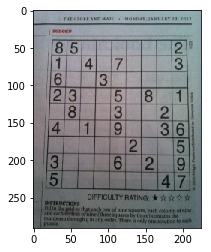

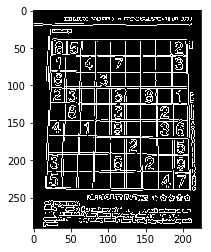

In [73]:
import cv2, time
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/sudoku.jpg')

# 케니 엣지 적용 
edges = cv2.Canny(img, 100, 200)

# 결과 출력
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()

## 모폴로지
: 노이즈 제거, 구멍메꾸기, 연결되지 않은 경계 이어붙이기 등 형태학적 관점에서의 영상 연산  
  대표적인 연산은 침식과 팽창이며, 이 둘을 결합한 열림과 닫힘 연산이 있습니다.

### 침식연산
: 원래 있던 객체의 영역을 깍아 내리는 연산

* **cv2.getStructuringElement(shape, ksize[, anchor]) : 커널생성**
    - shape : 구조화 요소 커널의 모양 결정(0과 1로 이루어진 커널)
        - cv2.MORPH_RECT: : 사각형
        - cv2.MORPH_ELLIPSE : 타원형
        - cv2.MORPH_CROSS : 십자형
    - ksize : 커널 크기 
    - anchor : 구조화 요소의 기준점, cv2.MORPH_CROSS에만 의미 있고 기본 값은 중심점(-1, -1)

* **dst = cv2.erode(src, kernel [, anchor, iterations, borderType, borderValue]) : 침식 연산 위한 함수**
    - src : 입력영상, Numpy 객체, 바이너리 영상( 검은색 : 배경, 흰색 : 전경)
    - kernel : 구조화 요소 커널 객체
    - anchor : cv2.getStruchturingElement()와 동일
    - interatios : 침식 연산 적용 반복 횟수
    - borderType : 외곽 영역 보정 방법 설정 
    - borserValue : 외곽 영역 보정 값

#### 침식연산으로 노이즈제거하기

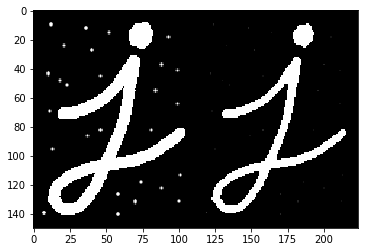

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/morph_dot.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# 침식 연산 적용 ---②
erosion = cv2.erode(img, k)

# 결과 출력
merged = np.hstack((img, erosion))
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.show()

### 팽창연산  
: 영상 속 사물의 주변을 덧붙여서 영역을 더 확장하는 연산입니다. 

* dst = cv2.dilate(src, kernel[, dst, anchor, iterations, borderType, borderValue])  
    - kernel : 구조화 요소 커널 객체
    - anchor : cv2.getStruchturingElement()와 동일
    - interatios : 침식 연산 적용 반복 횟수
    - borderType : 외곽 영역 보정 방법 설정 
    - borserValue : 외곽 영역 보정 값

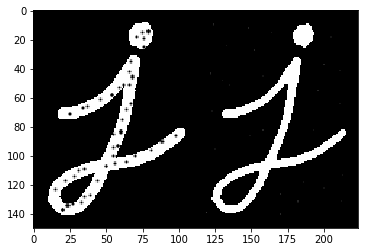

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/morph_hole.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# 팽창 연산 적용 ---②
dst = cv2.dilate(img, k)

# 결과 출력
merged = np.hstack((img, erosion))
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.show()

### 침식과 팽창 응용
* 열림 = 침식 + 팽창 : 주변보다 밝은 노이즈 제거, 독립된 개체 분리, 돌출된 픽셀제거
* 닫힘 = 팽창 + 침식 : 어두운 노이즈 제거, 끊어져 보이는 개체 연결, 구멍 메우기
* 그레이디언트 = 팽창 - 침식 : 경계 검출
* 탑햇 = 원본 - 열림 : 밝은 부분 영역을 강조 
* 블랙햇 = 닫힘 - 원본 : 어두운 부분 강조 

* dst = cv2.morphologyEx(src, op, kernel, [, dst, anchor, iteration, borderType, borderValue])
    - src : 입력 영상, Numpy 배열
    - op : 모폴로지 연산 종류 
        - cv2.MORPH_OPEN : 열림 연산
        - cv2.MORPH_CLOSE : 닫힘 연산
        - cv2.MORPH_GRADIENT : 그레이디언트 연산
        - cv2.MORPH_TOPHAT : 탑햇 연산
        - cv2.MORPH_BLACKHAT : 블랫햇 연산
    - kernel : 구조화 요소 커널
    - dst : 결과 영상 
    - anchor : 커널의 기준점
    - iteration : 연산 반복 횟수
    - borderType : 외곽 보정 방식
    - borserValue : 외곽 보정 값

#### 열림, 닫힘 연산

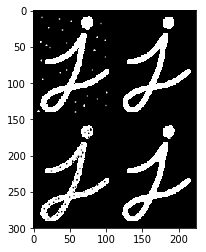

In [77]:
import cv2
import numpy as np

img1 = cv2.imread('img/morph_dot.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('img/morph_hole.png', cv2.IMREAD_GRAYSCALE)    

# 구조화 요소 커널, 사각형 (5x5) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# 열림 연산 적용 ---②
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, k)
# 닫힘 연산 적용 ---③
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, k)

# 결과 출력
merged1 = np.hstack((img1, opening))
merged2 = np.hstack((img2, closing))
merged3 = np.vstack((merged1, merged2))

plt.imshow(cv2.cvtColor(merged3, cv2.COLOR_BGR2RGB))
plt.show()

#### 모폴로지 그레이디언트
: 경계검출

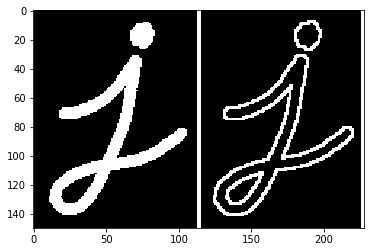

In [82]:
import cv2
import numpy as np

img = cv2.imread('img/morphological.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# 열림 연산 적용 ---②
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, k)

# 결과 출력
merged = np.hstack((img, gradient))
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.show()

#### 탑햇, 블랙햇 연산

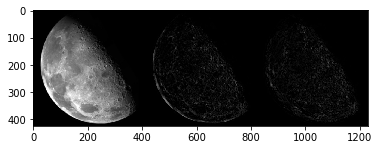

In [83]:
import cv2
import numpy as np

img = cv2.imread('img/moon_gray.jpg')

# 구조화 요소 커널, 사각형 (5x5) 생성 ---①

k = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

# 탑햇 연산 적용 ---②

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)

# 블랫햇 연산 적용 ---③

blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

# 결과 출력
merged = np.hstack((img, tophat, blackhat))
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.show()

# 영상분할

# 컨투어
### 컨투어(contour) : 윤곽선, 외곽선의 사전적 의미를 가지며 같은 색상이나 밝기의 연속된 점을  찾아내어 모양 분석과 객체 인식에 사용하는 것 

##### (1) image, contours, hierarchy = cv2.findContours(src, mode, method[, contours, hierarchy, offset])  
: 이미지의 컨투어 정보, 컨투어의 상하구조(hierarchy) 정보를 출력한다. **흑백, 이진화 이미지만 사용 가능**
- src : 입력 이미지 
- mode : 컨투어 제공방식 
	* cv2.RETR_EXTERNAL : 가장 바깥쪽 라인만 제공
	* cv2.RETR_LIST : 모든 라인을 계층 없이 제공
	* cv2.RETR_CCOMP:모든 라인을 2계층으로 제공
	* cv2.RETR_TREE : 모든 라인의 모든 계층 정보를 트리 구조로 제공
- method : 근사 값 방식 선택 
	* cv2.CHAIN_APPROX_NONE : 근사 계산하지 않고 모든 좌표 제공
	* cv2.CHAIN_APPROX_SIMPLE : 컨투어 꼭짓점 좌표만 제공
	*  cv2.CHAIN_APPROX_TC89_L1 :The-Chin 알고리즘으로 좌표 개수 축소
	*  cv2.CHAIN_APPROX_TC89_KCOS :The-Chin 알고리즘으로 좌표 개수 축소

#### (2) cv2.drawContours(img, contours, contour_Idx, color, thickness)  
: cv2.findContours() 함수로 얻은 컨투어 좌표를 선으로 표시하고 싶을 때 컨투어 연결선을 손쉽게 그리는 함수 
- img : 입력
- contours : 그림 그릴 컨투어 배열
- contourIdx : 그림 그릴 컨투어 인덱스 ( -1 : 모든 컨투어 표시 ) 
- color : 색상 값 
- thickness : 선 두께, 0 : 채우기


### Contours 기초

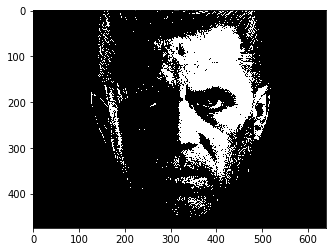

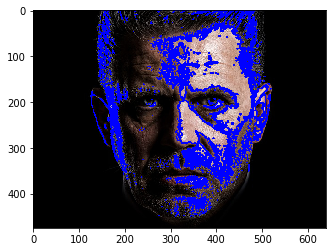

In [99]:
import cv2 
import matplotlib.pyplot as plt 

image = cv2.imread('img/man_face.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # 그레이 형태로 불러옴 
ret, thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY) # 이진화 처리 -> 컴퓨터가 더 찾기 쉽기 때문이다.

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#모든 계층 정보를 트리 구조로 제공/컨투어 꼭짓점 좌표만 제공

# 모든 컨투어를 그린다.
image = cv2.drawContours(image, contours, -1, (255,0,0), 2) # -1은 전체의 컨투어

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### 컨투어 계층트리

In [111]:
import cv2
import numpy as np

# 영상 읽기
img = cv2.imread('img/shapes_donut.png')
img2 = img.copy()
# 바이너리 이미지로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
# 가장 바깥 컨투어만 수집   --- ①
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# 컨투어 갯수와 계층 트리 출력 --- ②
print(len(contour), hierarchy)

# 모든 컨투어를 트리 계층 으로 수집 ---③
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 컨투어 갯수와 계층 트리 출력 ---④
print(len(contour2), hierarchy)

# 가장 바깥 컨투어만 그리기 ---⑤
cv2.drawContours(img, contour, -1, (0,255,0), 3) # -1은 전체의 컨투어
# 모든 컨투어 그리기 ---⑥
for idx, cont in enumerate(contour2): 
    # 랜덤한 컬러 추출 ---⑦
    color = [int(i) for i in np.random.randint(0,255, 3)]
    # 컨투어 인덱스 마다 랜덤한 색상으로 그리기 ---⑧
    cv2.drawContours(img2, contour2, idx, color, 3)
    # 컨투어 첫 좌표에 인덱스 숫자 표시 ---⑨
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255))

# 화면 출력
cv2.imshow('RETR_EXTERNAL', img)
cv2.imshow('RETR_TREE', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

3 [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]
6 [[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


#### 모멘트를 이용한 중심점, 넓이, 둘레길이

In [120]:
import cv2
import numpy as np

img = cv2.imread("img/shapes.png")
# 그레이 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 바이너리 스케일 변환
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)
print("ret: ", ret)
print("th: ", th)
# 컨투어 찾기
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("contours: ", contours)
print("hierarchy: ", hierarchy)

# 각 도형의 컨투어에 대한 루프
for c in contours:
    # 모멘트 계산
    mmt = cv2.moments(c)
    print("mmt: ", mmt)
    # m10/m00, m01/m00  중심점 계산 -> 필요할 때마다 갖다 쓰면 됩니다.
    cx = int(mmt['m10']/mmt['m00'])
    cy = int(mmt['m01']/mmt['m00']) 
    # 영역 넓이
    a = mmt['m00']
    # 영역 외곽선 길이
    I = cv2.arcLength(c, True) # True값은 외곽선의 닫힘 여부
    # 중심점에 노란색 점 그리기
    cv2.circle(img, (cx, cy), 5, (0, 255, 255), -1)
    # 중심점 근처에 넓이 그리기
    cv2.putText(img, "A:%.0f"%a, (cx, cy+20), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255))
    # 컨투어 시작점에 길이 그리기
    cv2.putText(img, "L:%.2f"%I, tuple(c[0][0]), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0))
    # 함수로 컨투어 넓이 계산해서 출력 # True값은
    print("area:%.2f"%cv2.contourArea(c, False))

# 결과 출력
cv2.imshow('center', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

ret:  127.0
th:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
contours:  [array([[[338,  19]],

       [[337,  20]],

       [[333,  20]],

       [[332,  21]],

       [[329,  21]],

       [[328,  22]],

       [[326,  22]],

       [[325,  23]],

       [[323,  23]],

       [[322,  24]],

       [[321,  24]],

       [[320,  25]],

       [[319,  25]],

       [[318,  26]],

       [[317,  26]],

       [[315,  28]],

       [[314,  28]],

       [[312,  30]],

       [[311,  30]],

       [[300,  41]],

       [[300,  42]],

       [[298,  44]],

       [[298,  45]],

       [[296,  47]],

       [[296,  48]],

       [[295,  49]],

       [[295,  50]],

       [[294,  51]],

       [[294,  52]],

       [[293,  53]],

       [[293,  55]],

       [[292,  56]],

       [[292,  58]],

       [[291,  59]],

       [[291,  62]],

       [[290,  63]],

       [[290,  67]],

       [[289,  68]],

       [[289,  

### Contour 심화
#### * x,y,w,h = cv2.boundingRect(contour) : Contour를 포함하는 도형의 좌표를 출력해줍니다. 
 - x,y : 사각형 왼쪽 상단 좌표 
 - w, h : 폭, 높이
 - contour : 다각형 좌표


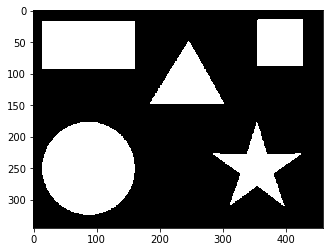

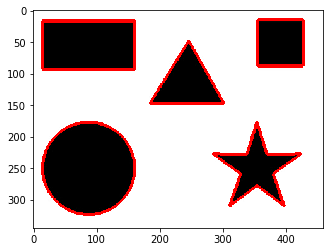

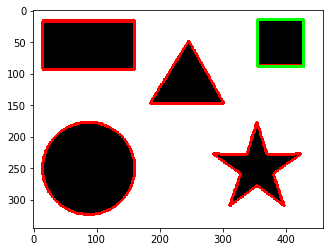

In [130]:
import cv2 
import matplotlib.pyplot as plt 

image = cv2.imread('img/5shapes.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
ret, thresh = cv2.threshold(image_gray, 230, 255, cv2.THRESH_BINARY) # 수행결과는 흰배경에 검은 객체
thresh = cv2.bitwise_not(thresh) # 반전

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)) 
plt.show()

# 모든계층의 정보를 트리구조로 제공, 컨투어 꼭지점 좌표만이용
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4) # 모든 외곽(-1)의 contour 추출

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[4] # 숫자 바꿔보기
x, y, w, h = cv2.boundingRect(contour)
# 첫번째 contuor를 포함하는 사각형 그리기
image = cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


#### * cv2.convexHull(points) : 대략적인 형태의 Contour 구하기
    - points : 입력 컨투어 


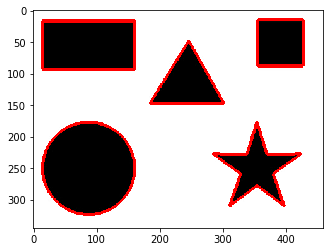

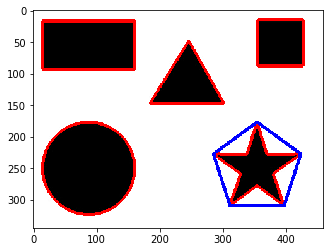

In [22]:
import cv2 
import matplotlib.pyplot as plt 

image = cv2.imread('img/5shapes.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
# 수행결과는 흰배경에 검은 객체
#반전

# 모든계층의 정보를 트리구조로 제공, 컨투어 꼭지점 좌표만이용
 
#모든 외곽(-1)의 contour 추출

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#하나의 contour


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


#### * cv2.approxPolyDP(contour, epsilon, closed)
    - contour : 대상 컨투어 좌표
    - epsilon : 근사값 정확도, 오차범위
    - closed : 컨투어의 닫힘 여부


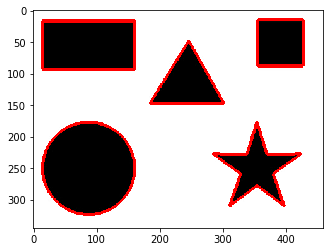

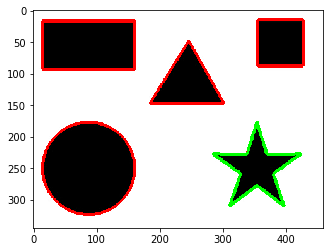

In [137]:
import cv2 
import matplotlib.pyplot as plt 

image = cv2.imread('img/5shapes.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
ret, thresh = cv2.threshold(image_gray, 230, 255, 0) # 수행결과는 흰배경에 검은 객체
thresh = cv2.bitwise_not(thresh) #반전

# 모든계층의 정보를 트리구조로 제공, 컨투어 꼭지점 좌표만이용
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4) # 모든 외곽(-1)의 contour 추출

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0] # 하나의 contour
epsilon = 0.001 * cv2.arcLength(contour, True) # epsilon 값이 작을 수록 정확도가 높아진다. 
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


#### * cv2.moments(contour) : Contour의 특징을 추출합니다. 
    - contour : 모멘트 계산 대상 컨투어 좌표 
    - moment : 결과 모멘트, 파이썬 딕셔너리 

#### * cv2.contourArea(contour) : Contour의 면적을 구합니다.

#### * cv2.arcLength(contour) : Contour의 둘레를 구합니다. 
  - True 일 때는 컨투어의 시작점과 끝점을 이어 도형을 구성하고 그 둘레 값을 계산한다. False인 경우 시작점과 끝점을 잇지 않고 둘레를 계산


5874.5
560.9432101249695
{'m00': 5874.5, 'm10': 2084107.8333333333, 'm01': 1469293.6666666665, 'm20': 743183025.0833333, 'm11': 521261903.2083333, 'm02': 371292163.5833333, 'm30': 266356806855.95, 'm21': 185878713628.16666, 'm12': 131722715990.23334, 'm03': 94766420348.0, 'mu20': 3800020.4086612463, 'mu11': -2279.303719639778, 'mu02': 3801504.1388227344, 'mu30': 32870.49206542969, 'mu21': -18400.030210733414, 'mu12': -189558.53965687752, 'mu03': -500470.09757995605, 'nu20': 0.110114399007024, 'nu11': -6.604810823398463e-05, 'nu02': 0.11015739352743459, 'nu30': 1.2427361596340328e-05, 'nu21': -6.956507628702611e-06, 'nu12': -7.166648163651214e-05, 'nu03': -0.00018921295301578385}


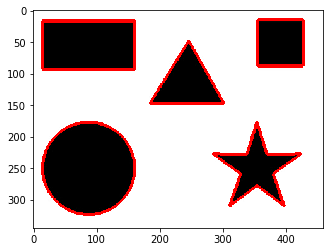

In [46]:
import cv2 
import matplotlib.pyplot as plt 

image = cv2.imread('img/5shapes.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
ret, thresh = cv2.threshold(image_gray, 230, 255, 0) # 수행결과는 흰배경에 검은 객체
thresh = cv2.bitwise_not(thresh) #반전

# 모든계층의 정보를 트리구조로 제공, 컨투어 꼭지점 좌표만이용

#모든 외곽(-1)의 contour 추출


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


### 그랩컷
*mask, bgdModel, fgdModel = cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount[, mode]) *img : 입력 영상

* mask : 입력 영상과 크기가 같은 1채널 배열, 배경과 전경을 구분하는 값 저장 
    * cv2.GC_BGD : 확실한 배경(0)
    * cv2.GC_FGD : 확실한 전경(1)
    * cv2.GC_PR_BGD : 덜 확실한 배경 (2)
    * cv2.GC_PR_FGD : 덜 확실한 배경 (3)
* rect : 전경이 있을 것으로 추측되는 영역의 사각형 좌표, 튜플(x1, y1, x2, y2)
* bgdModel, fgdModel : 함수 내에서 사용할 임시 배열 버퍼(재사용할 경우 수정X) 
* iterCount : 반복 횟수
* mode : 동작 방법 
    * cv2.GC_IINIT_WITH_RECT : rect에 지정한 좌표를 기준으로 그랩컷 수행
    * cv2.GC_INIT_WITH_MASK : mask에 지정한 값을 기준으로 그랩컷 수행 
    * cv2.GC_EVAL : 재시도 